In [3]:
import os, sys

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import seaborn as sns

In [18]:
data_dir = "../../data/2022-11-22"

In [19]:
dirnames = os.listdir(data_dir)
dirnames = list(os.path.join(data_dir, f) for f in dirnames)

fnames = []

for dirname in dirnames:
    files = os.listdir(dirname)
    for file in files:
        if ".dat" in file:
            fnames.append(f"{dirname}/{file}")
            print(file)

frq_data.dat
frq_data.dat
characterization_data.dat
frq_data.dat
characterization_data.dat
frq_data.dat
frq_data.dat
frq_data.dat


In [20]:
data = []
init_length = 300
for fname in fnames:
    dat = pd.read_csv(fname)
    dat["t"] = dat["T_(ms)"]/1000 #ms to s
    #dat["y"] = 90.08745-((dat["V_dist_(mA)"]-4)/16)*101.60 #convert milliamp to millimeters
    dat["y"] = (dat["V_dist_(mA)"]*(-100.0/16.0)+125-11.2625) #convert milliamp to millimeters
    dat["strain"] = (init_length-dat["y"])/init_length
    dat["p_c"] = (dat["Comp_P_(mA)"]-4)*0.75
    dat["v"] = dat["Sys_Volts_(V)"]
    dat["l"] = dat["LC_(grams)"]
    dat["p_p"] = (dat["Piezo_P_(mA)"]-4)*0.75
    dat["p_o"] = 6*(dat["Piezo_out_(mV)"]-4000)/16000 #converting milliamp output to expected bar output
    dat.style.set_caption(fname.split('/')[-1].split('.')[0])
    data.append(dat)

In [31]:
def plot_test(df):
    fig, axes = plt.subplots(5,1, sharex=True, figsize=(15,10))
    axes[0].plot(df["t"], df["y"],linestyle='None',marker='o',markersize=1)
    axes[0].plot(0, 0,linestyle='None',marker='o',markersize=1, color='r')
    axes[0].grid()
    axes[0].set_ylabel("Distance (mm)")

    axes[1].plot(df["t"], df["l"],linestyle='None',marker='o',markersize=1,color='r')
    axes[1].grid()
    axes[1].set_ylabel("Load (grams)")
    
    axes[2].plot(df["t"], df["p_o"],linestyle='None',marker='o',markersize=1)
    axes[2].grid()
    axes[2].plot(df["t"], df["p_p"],linestyle='None',marker='o',markersize=1)
    axes[2].set_ylabel("Pressure - Actuator \n(Bar)")
    #axes[2].set_ylim([-0.25, 6.25])

    axes[2].legend(["Pressure Out","Pressure Gauge"])

    axes[3].plot(df["t"], df["p_c"],linestyle='None',marker='o',markersize=1)
    axes[3].grid()
    #axes[2].set_ylim([-0.25, 6.25])
    axes[3].set_ylabel("Pressure - Comp. \n(Bar)")

    axes[4].plot(df["t"], df["v"],linestyle='None',marker='o',markersize=1)
    axes[4].grid()
    axes[4].set_ylabel("System (V)")
    plt.suptitle("Experiment")
    plt.show()

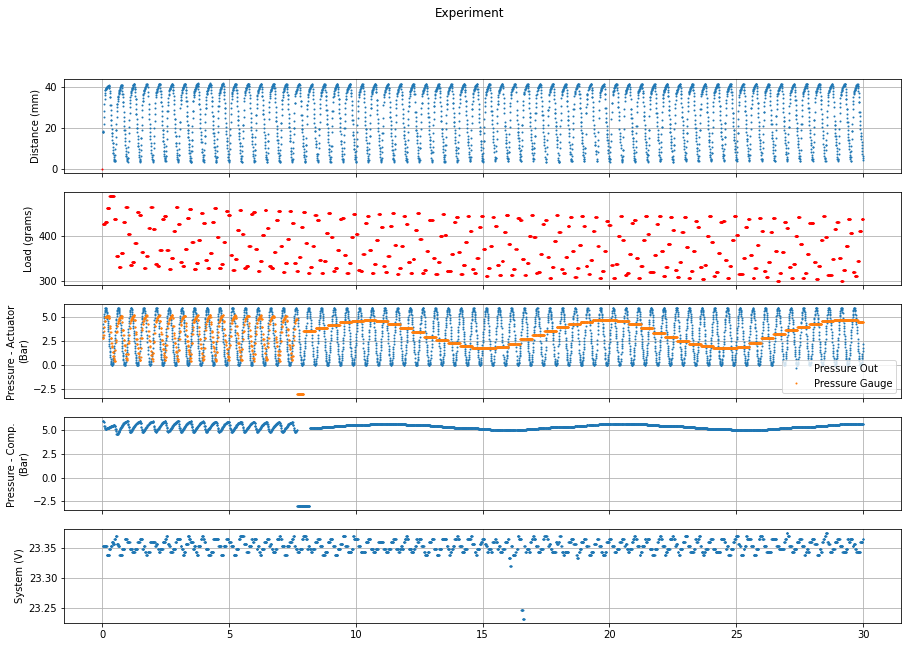

In [32]:
plot_test(data[6])

In [37]:
def plot_test_shared(df):
    fig, axes = plt.subplots(4,1, sharex=True, figsize=(15,10))
    axes[0].plot(df["t"], df["y"],linestyle='None',marker='o',markersize=1)
    axes[0].plot(0, 0,linestyle='None',marker='o',markersize=1, color='r')
    axes[0].grid()
    axes[0].set_ylabel("Distance (mm)")

    
    x_shared = axes[0].twinx()
    x_shared.plot(df["t"], df["l"],linestyle='None',marker='o',markersize=1,color='r')
    x_shared.grid()
    x_shared.set_ylabel("Load (grams)")
    
    axes[1].plot(df["t"], df["p_o"],linestyle='None',marker='o',markersize=1)
    axes[1].grid()
    axes[1].plot(df["t"], df["p_p"],linestyle='None',marker='o',markersize=1)
    axes[1].set_ylabel("Pressure - Actuator \n(Bar)")
    #axes[2].set_ylim([-0.25, 6.25])

    axes[1].legend(["Pressure Out","Pressure Gauge"])

    axes[2].plot(df["t"], df["p_c"],linestyle='None',marker='o',markersize=1)
    axes[2].grid()
    #axes[2].set_ylim([-0.25, 6.25])
    axes[2].set_ylabel("Pressure - Comp. \n(Bar)")

    axes[3].plot(df["t"], df["v"],linestyle='None',marker='o',markersize=1)
    axes[3].grid()
    axes[3].set_ylabel("System (V)")
    plt.suptitle("Aliasing Example", fontsize=24)
    plt.show()

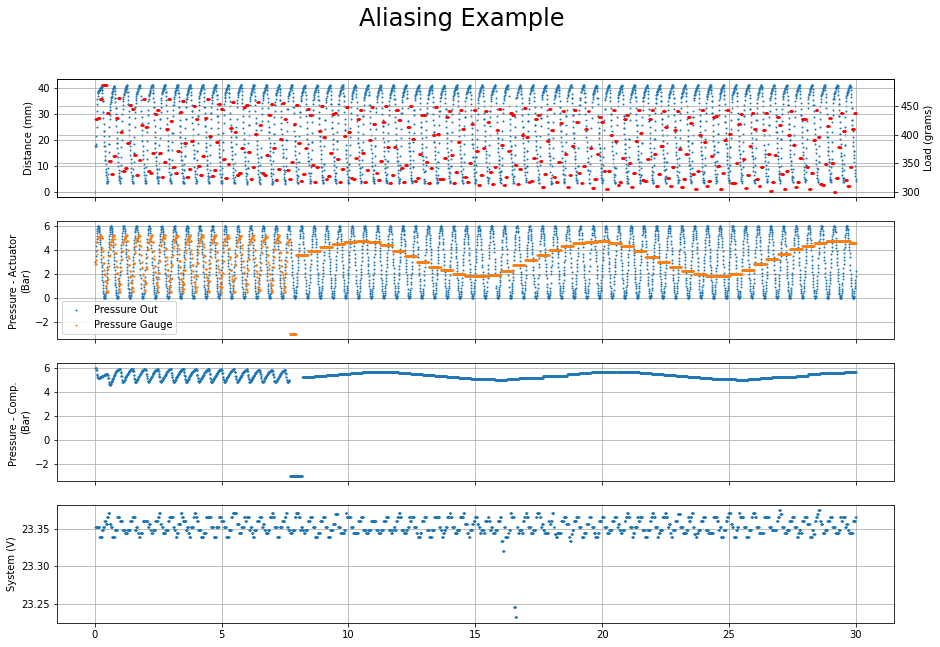

In [38]:
plot_test_shared(data[6])